# **Preprocesado de datos**

## Importación de librerías

In [1]:
!pip install pandas
!pip install numpy
import pandas as pd
import numpy as np

## Importación del dataset

In [2]:
df = pd.read_csv("captura_tcp_curso5g.csv")

## Limpieza de datos

### Eliminación de flujos TCP internos

In [3]:
filtro = df['s_ip:15'].str.startswith('10.100.200.')
df = df[~filtro]

### Etiquetado de datos

In [4]:
df.loc[:,'label'] = 0

condition = (df['#15#c_ip:1'] == '10.100.200.6') & (df['s_port:16'] == 5555)

df.loc[condition, 'label'] = 1

df

,#15#c_ip:1,c_port:2,c_pkts_all:3,c_rst_cnt:4,c_ack_cnt:5,c_ack_cnt_p:6,c_bytes_uniq:7,c_pkts_data:8,c_bytes_all:9,c_pkts_retx:10,...,s_last_handshakeT:122,c_appdataT:123,s_appdataT:124,c_appdataB:125,s_appdataB:126,fqdn:127,dns_rslv:128,req_tm:129,res_tm:130,label
12,10.100.200.6,56196,17,1,15,11,1018,3,1018,0,...,0.000,0.000,0.000,0,0,-,-,0.0,0.0,1
347,10.100.200.3,50954,13,1,11,6,780,4,780,0,...,861.747,862.422,1146.129,644,5279,-,-,0.0,0.0,0
348,10.100.200.6,32906,16,1,14,10,1018,3,1018,0,...,0.000,0.000,0.000,0,0,-,-,0.0,0.0,1
349,10.100.200.3,45276,15,1,13,4,828,8,828,0,...,44.170,45.049,58.837,582,3723,-,-,0.0,0.0,0
350,10.100.200.6,35842,17,1,15,12,785,2,785,0,...,0.000,0.000,0.000,0,0,-,-,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,10.100.200.3,35972,44,1,42,33,846,8,846,0,...,54.834,56.360,79.077,598,3567,-,-,0.0,0.0,0
1262,10.100.200.3,53342,18,1,16,7,841,8,841,0,...,58.658,59.727,76.285,598,4740,-,-,0.0,0.0,0
1263,10.100.200.6,50868,17,1,15,13,552,1,552,0,...,0.000,0.000,0.000,0,0,-,-,0.0,0.0,1
1264,10.100.200.6,44022,11,1,9,6,785,2,785,0,...,0.000,0.000,0.000,0,0,-,-,0.0,0.0,1


### Selección de métricas relevantes

In [5]:
#metricas = ['c_pkts_all:3', 'c_ack_cnt:5', 'c_bytes_uniq:7', 'c_pkts_data:8', 'c_bytes_all:9', 's_pkts_all:17',	's_ack_cnt:19',	's_bytes_uniq:21',	's_pkts_data:22',	's_bytes_all:23', 'label']
#metricas = ['s_bytes_uniq:21',	's_pkts_data:22',	's_bytes_all:23', 'label']
metricas = ['c_pkts_all:3', 'c_ack_cnt:5', 's_pkts_all:17',	's_ack_cnt:19', 'label']

df=df[metricas]

df.dtypes

c_pkts_all:3     int64
c_ack_cnt:5      int64
s_pkts_all:17    int64
s_ack_cnt:19     int64
label            int64
dtype: object

# Separación de variables independientes y variable dependiente

In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

# Separación del dataset en Training Set y Test Set

In [7]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [8]:
print(X_train)

[[  8   6  10  10]
 [ 17  15  19  19]
 [ 94  92 107 107]
 ...
 [239 237 149 149]
 [ 18  17  17  17]
 [ 97  96  51  51]]


In [9]:
print(y_train)

[1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0
 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0
 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0
 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1
 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0
 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1
 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0
 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 1 0 0 0 1 1 0 0 0 1 0 

In [10]:
print(X_test)

[[13 11 12 12]
 [16 15 16 16]
 [36 35 26 26]
 ...
 [16 15 15 15]
 [12 10 14 14]
 [95 94 45 45]]


In [11]:
print(y_test)

[0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0
 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0
 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0
 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0]


# Feature Scaling

In [12]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [13]:
print(X_train)

[[  8   6  10  10]
 [ 17  15  19  19]
 [ 94  92 107 107]
 ...
 [239 237 149 149]
 [ 18  17  17  17]
 [ 97  96  51  51]]


In [14]:
print(X_test)

[[13 11 12 12]
 [16 15 16 16]
 [36 35 26 26]
 ...
 [16 15 15 15]
 [12 10 14 14]
 [95 94 45 45]]


# Entrenamiento del modelo con el Training Set

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, max_depth= None,criterion = 'gini', random_state = 0)
#from sklearn.tree import DecisionTreeClassifier
#classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# Predicción de resultados en el Test Set

In [16]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Análisis de resultados

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Exactitud: ')
print(accuracy_score(y_test, y_pred))
print('Sensibilidad (TP Rate o Recall): ')
print(recall_score(y_test, y_pred))
print('Especificidad (TN Rate): ')
print(recall_score(y_test, y_pred, pos_label=0))
print('Puntaje F1: ')
print(f1_score(y_test, y_pred))

[[199  11]
 [  5 153]]
Exactitud: 
0.9565217391304348
Sensibilidad (TP Rate o Recall): 
0.9683544303797469
Especificidad (TN Rate): 
0.9476190476190476
Puntaje F1: 
0.9503105590062113


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       210
           1       0.93      0.97      0.95       158

    accuracy                           0.96       368
   macro avg       0.95      0.96      0.96       368
weighted avg       0.96      0.96      0.96       368



In [19]:
feature_importance = classifier.feature_importances_

importance_df = pd.DataFrame({
    'Feature': df.columns[:-1],
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

         Feature  Importance
1    c_ack_cnt:5    0.401402
0   c_pkts_all:3    0.268109
2  s_pkts_all:17    0.177338
3   s_ack_cnt:19    0.153151


# Visualización de resultados

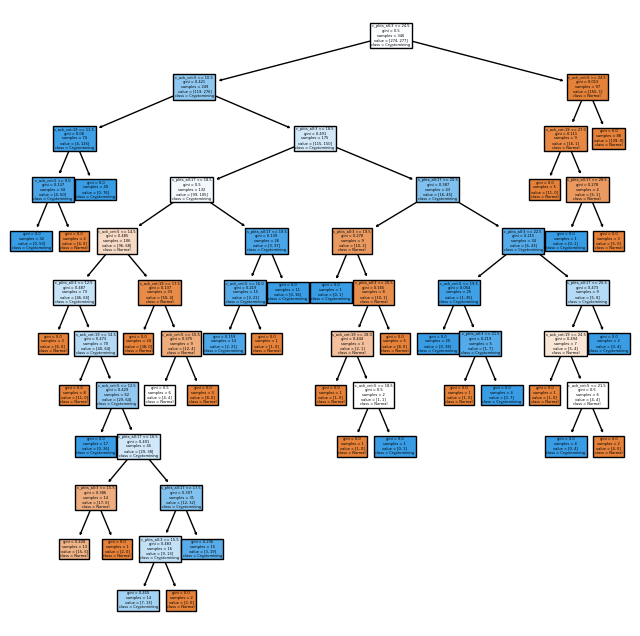

In [20]:
!pip install matplotlib
from sklearn import tree
import matplotlib.pyplot as plt

first_tree = classifier.estimators_[0]

plt.figure(figsize=(8, 8))
tree.plot_tree(first_tree, feature_names=df.columns.tolist(), class_names=['Normal', 'Cryptomining'], filled=True)
plt.show()